In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-19 08:53:24,736: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.providers.ibmq import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import  qiskit.quantum_info as qi
import qiskit.tools.jupyter

In [4]:
#DEVICE

In [5]:
qasm_sim = Aer.get_backend("qasm_simulator")
statevector_sim = Aer.get_backend("statevector_simulator")
unit_sim = Aer.get_backend("unitary_simulator")

In [7]:
qasm_sim.provider()

In [8]:
#IBMQ.load_account()  # Logging to IBMQ
provider = IBMQ.get_provider('ibm-q')
backends = least_busy(provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True))
backends

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

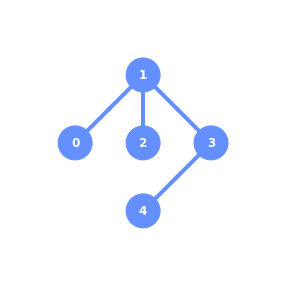

In [11]:
plot_gate_map(quantum_computer)

In [9]:
quantum_computer = provider.get_backend('ibmq_belem')

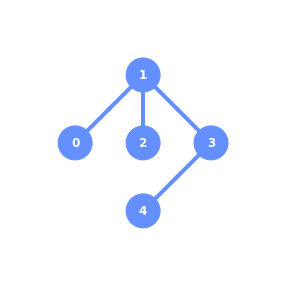

In [10]:
plot_gate_map(quantum_computer)

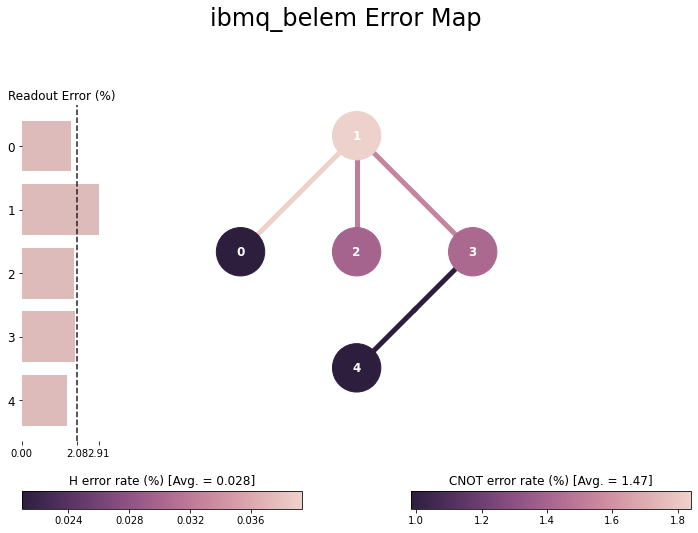

In [12]:
plot_error_map(quantum_computer)

In [13]:
#CIRCUIT

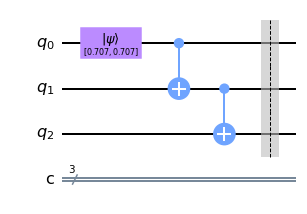

In [14]:
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")

qc = QuantumCircuit(qr, cr)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.cx([qr[0], qr[1]], [qr[1], qr[2]])
qc.barrier()

qc.draw()

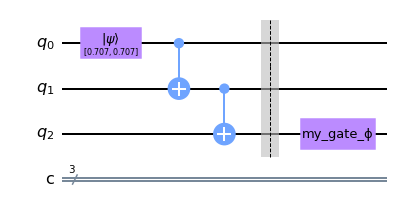

In [15]:
qreg = QuantumRegister(1)
qgate = QuantumCircuit(qreg)
qgate.h(qreg)
#qgate.cp(np.pi, 0, 1)

gate = qgate.to_gate()
gate.name = 'my_gate_ϕ'

qc.append(gate, [2])
qc.draw(output='mpl')

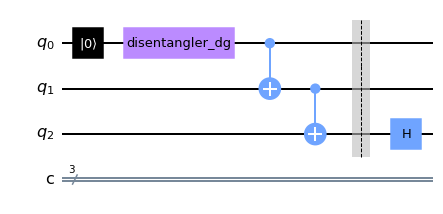

In [16]:
qc_decomp = qc.decompose()
qc_decomp.draw()

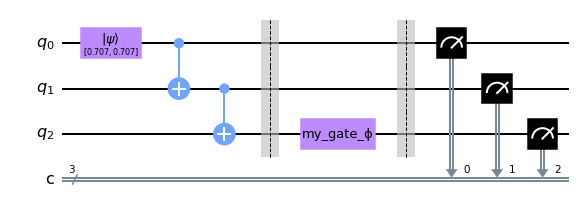

In [17]:
qc.barrier()
qc.measure(qr, cr)
circuit_drawer(qc, output='mpl')

In [18]:
qgate.measure_all()

In [20]:
qasm_str = qgate.qasm()
qasm_str



'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q0[1];\ncreg meas[1];\nh q0[0];\nbarrier q0[0];\nmeasure q0[0] -> meas[0];\n'

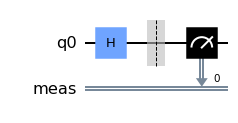

In [21]:
qc_qasm = QuantumCircuit.from_qasm_str(qasm_str)
qc_qasm.draw(output="mpl")

In [22]:
#Execute

In [23]:
qc_job = execute(qc, qasm_sim, shorts=1024)
qc_result = qc_job.result()
qc_count = qc_result.get_counts()

qgate_job = qasm_sim.run(qgate, shots=1024)
qgate_result = qgate_job.result()
qgate_count = qgate_result.get_counts()

In [24]:
print("QC : ", qc_count)
print("QGATE : ", qgate_count)

QC :  {'100': 278, '000': 244, '111': 254, '011': 248}
QGATE :  {'1': 516, '0': 508}


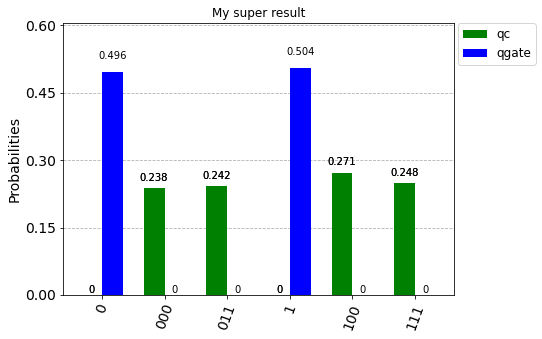

In [25]:
plot_histogram([qc_count, qgate_count], color=["green", "blue"], 
               sort="asc", legend=["qc", "qgate"], title="My super result")

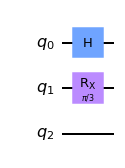

In [26]:
qc_sv = QuantumCircuit(3)
#qc_sv.rx(np.pi/3, 0)
qc_sv.h(0)
qc_sv.rx(np.pi/3, 1)
qc_sv.draw()

In [28]:
q_operator = QuantumCircuit(2)
q_operator.cx(0, 1)
operator = qi.Operator(q_operator)
operator



Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

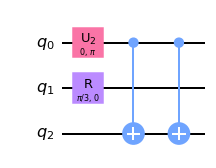

In [29]:
qc_sv.append(q_operator, [0, 2])

qc_sv.decompose().draw()

In [30]:
qc_job_sv = execute(qc_sv, statevector_sim).result()
qc_psi = qc_job_sv.get_statevector()

qc_psi

array([0.61237244+0.j        , 0.61237244+0.j        ,
       0.        -0.35355339j, 0.        -0.35355339j,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


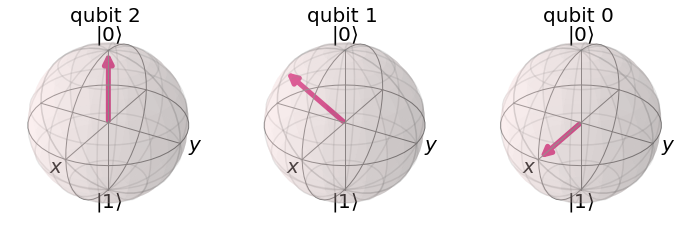

In [31]:
plot_bloch_multivector(qc_psi, reverse_bits=True)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


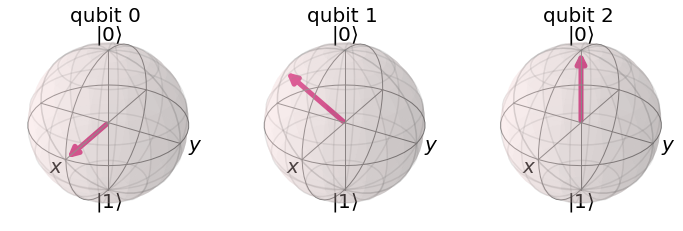

In [32]:
plot_bloch_multivector(qc_psi, reverse_bits=False)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


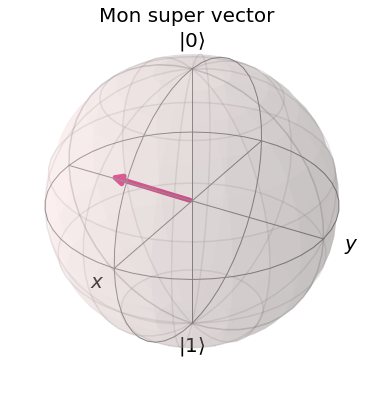

In [33]:
plot_bloch_vector([np.pi/3, 0, 1/np.sqrt(2)], title="Mon super vector")

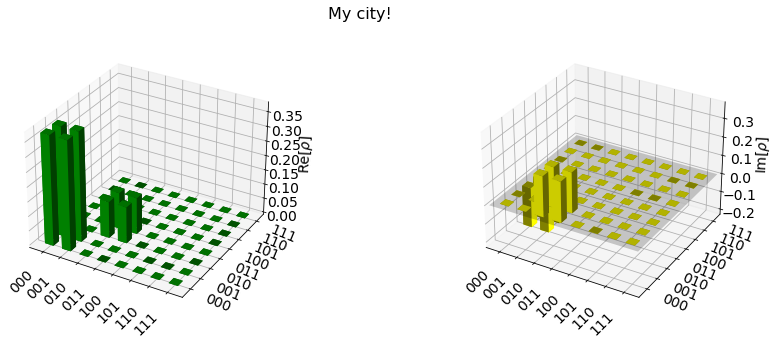

In [34]:
plot_state_city(qc_psi, title="My city!", color=["green", "yellow"])

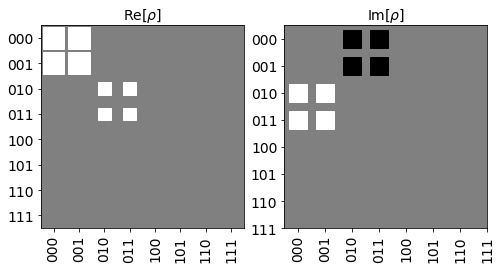

In [35]:
plot_state_hinton(qc_psi)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


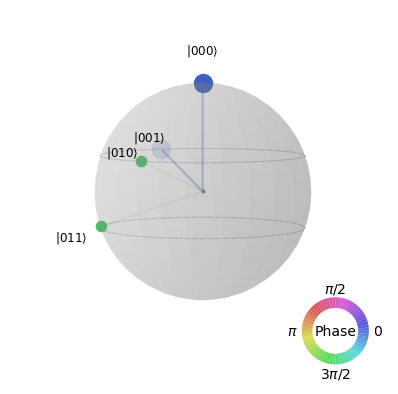

In [36]:
plot_state_qsphere(qc_psi)

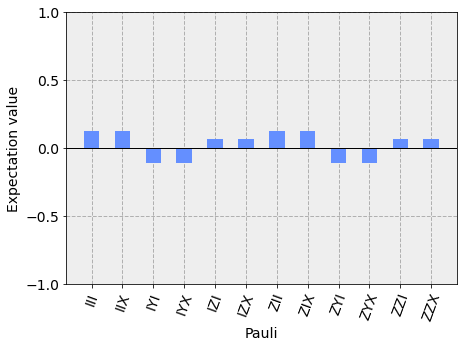

In [37]:
plot_state_paulivec(qc_psi)

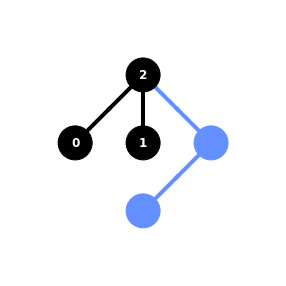

In [38]:
transpile_qc = transpile(qc_sv, backend=quantum_computer, 
                         optimization_level=3, coupling_map=[[0, 1], [1, 2]])
plot_circuit_layout(transpile_qc, quantum_computer)

In [39]:
qiskit.__version__

'0.18.3'

In [40]:
%qiskit_version_table

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.3
qiskit-aer,0.9.1
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.18.0
qiskit-aqua,0.9.5
qiskit,0.32.0
qiskit-nature,0.2.2
qiskit-finance,0.2.1
qiskit-optimization,0.2.3
qiskit-machine-learning,0.2.1


In [41]:
#Balaji

In [42]:
#Quantum Entanglement

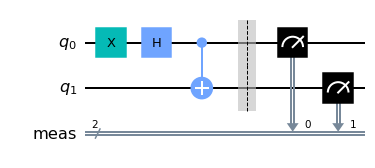

In [49]:
bell=QuantumCircuit(2)
bell.x(0)
bell.h(0)
bell.cx(0,1)
bell.measure_all()
bell.draw()


In [50]:
qasm_sim=BasicAer.get_backend('qasm_simulator')
result=execute(bell,qasm_sim,shots=2000)
counts=job.result().get_counts()

Traceback (most recent call last):
  File "/tmp/ipykernel_72/3340481306.py", line 3, in <module>
    counts=job.result().get_counts()
AttributeError: module 'qiskit.providers.ibmq.job' has no attribute 'result'

Use %tb to get the full traceback.


In [52]:
qc=QuantumCircuit(3)
qc.h(0)
qc.cx([0,0],[1,2])
backend_sv=BasicAer.get_backend('statevector_simulator')
job=execute(qc,backend_sv,shots=1024)
result=job.result()
sv_ev=result.get_statevector(qc)

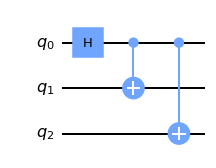

In [54]:
qc.draw()

In [53]:
sv_ev

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

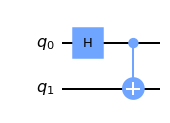

In [58]:
#Quantum Entanglement
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()


In [59]:
backend_sv=BasicAer.get_backend('statevector_simulator')
job=execute(qc,backend_sv,shots=1024)
result=job.result()
sv_ev=result.get_statevector(qc)

In [56]:
sv_ev

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

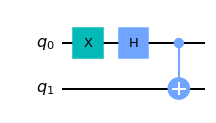

In [61]:
#Quantum Entanglement
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [62]:
backend_sv=BasicAer.get_backend('statevector_simulator')
job=execute(qc,backend_sv,shots=1024)
result=job.result()
sv_ev=result.get_statevector(qc)

In [63]:
sv_ev

array([ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j])

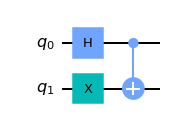

In [65]:
#Quantum Entanglement
qc=QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [66]:
backend_sv=BasicAer.get_backend('statevector_simulator')
job=execute(qc,backend_sv,shots=1024)
result=job.result()
sv_ev=result.get_statevector(qc)

In [67]:
sv_ev

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [68]:
#Barrier

In [74]:
qc=QuantumCircuit(3)
qc.h(0)
qc.z(1)
qc.x(2)
qc.barrier(0,1)
#qc.barrier(1,2)
qc.cx(0,1)
qc.h(2)
#qc.barrier()
#qc.barrier(:1)
qc.draw(output='mpl')

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "/tmp/ipykernel_72/218979097.py", line 10
    qc.barrier(:1)
               ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.
